In [1]:
pip install mediapipe

In [2]:
!wget -q -O efficientdet.tflite -q https://storage.googleapis.com/mediapipe-models/object_detector/efficientdet_lite0/int8/1/efficientdet_lite0.tflite

In [3]:
import cv2
import numpy as np

MARGIN = 10  # pixels
ROW_SIZE = 10  # pixels
FONT_SIZE = 1
FONT_THICKNESS = 1
TEXT_COLOR = (255, 0, 0)  # red


def visualize(
    image,
    detection_result
) -> np.ndarray:
  for detection in detection_result.detections:
    bbox = detection.bounding_box
    start_point = bbox.origin_x, bbox.origin_y
    end_point = bbox.origin_x + bbox.width, bbox.origin_y + bbox.height
    cv2.rectangle(image, start_point, end_point, TEXT_COLOR, 3)

    category = detection.categories[0]
    category_name = category.category_name
    probability = round(category.score, 2)
    result_text = category_name + ' (' + str(probability) + ')'
    text_location = (MARGIN + bbox.origin_x,
                     MARGIN + ROW_SIZE + bbox.origin_y)
    cv2.putText(image, result_text, text_location, cv2.FONT_HERSHEY_PLAIN,
                FONT_SIZE, TEXT_COLOR, FONT_THICKNESS)

  return image

In [4]:
from google.colab import files
uploaded = files.upload()

for sample in uploaded:
   content = uploaded[sample]
   with open(sample, 'wb') as f:
     f.write(content)

if len(uploaded.keys()):
   IMAGE_FILE = next(iter(uploaded))
   print('Uploaded file:', IMAGE_FILE)

Saving sample.jpg to sample (1).jpg
Uploaded file: sample (1).jpg


In [5]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

In [6]:
model_path = '/absolute/path/to/lite-model_efficientdet_lite0_detection_metadata_1.tflite'

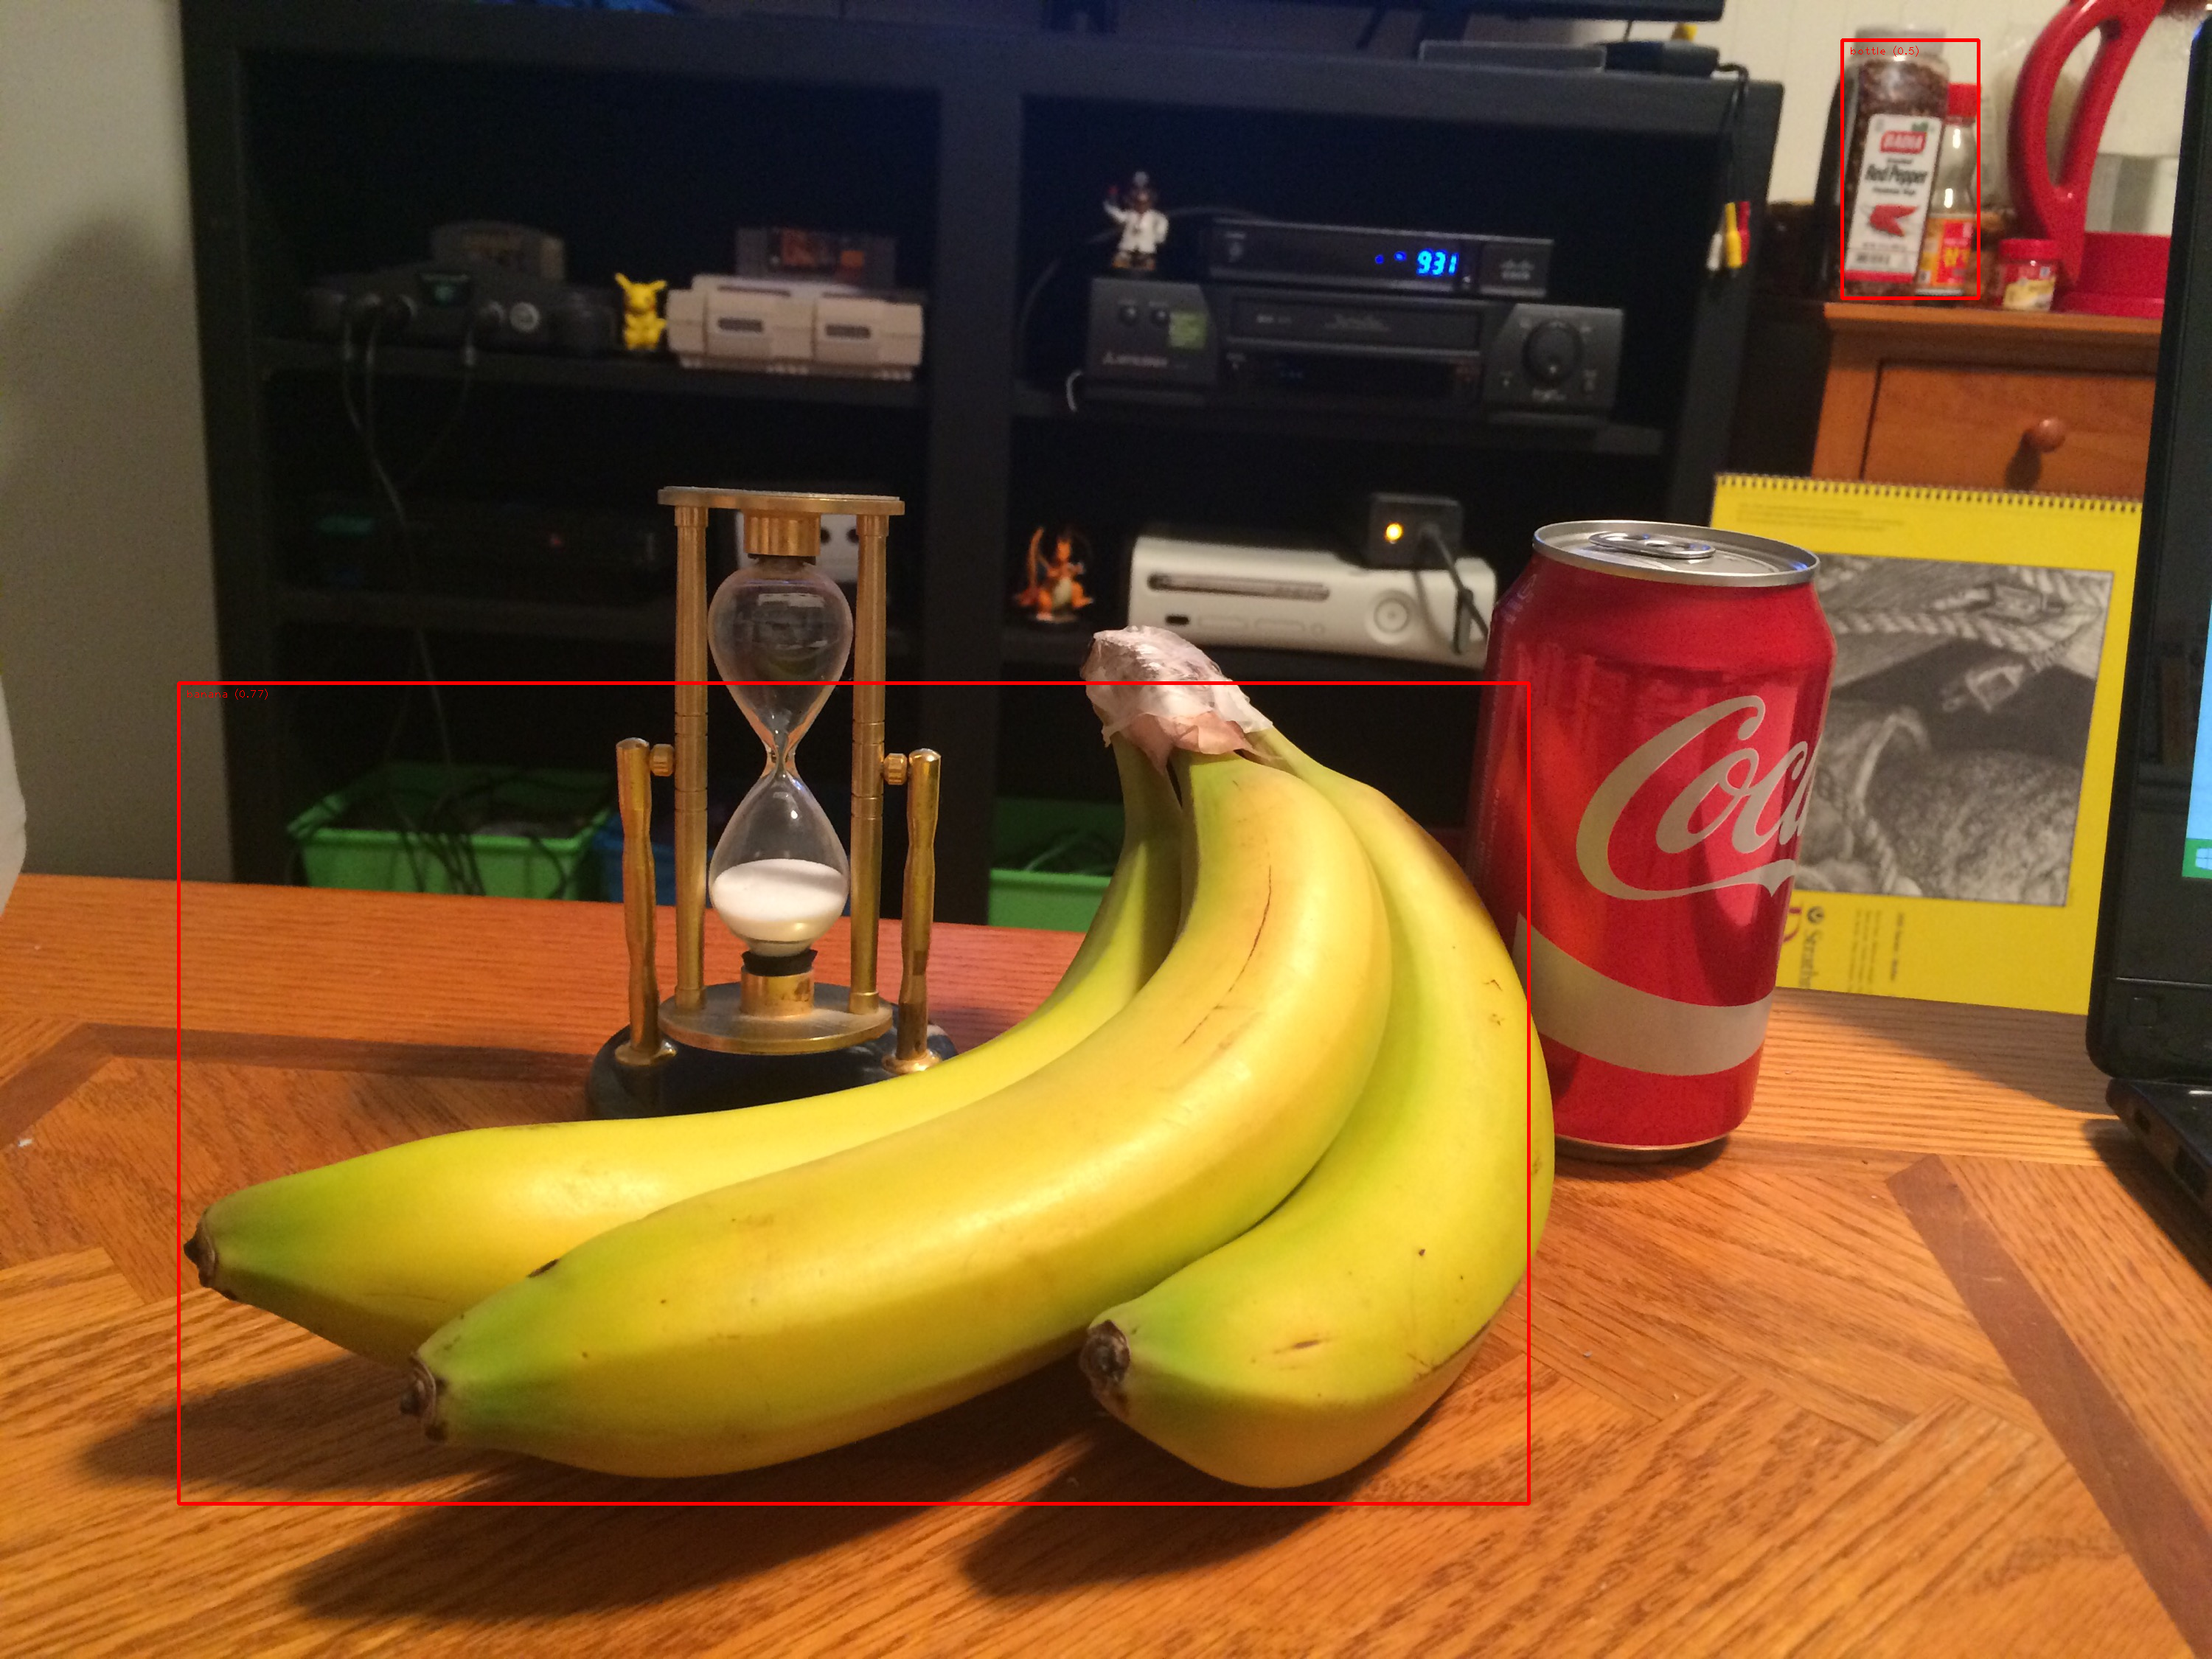

In [7]:
from google.colab.patches import cv2_imshow

base_options = python.BaseOptions(model_asset_path='efficientdet.tflite')
options = vision.ObjectDetectorOptions(base_options=base_options,
                                       score_threshold=0.5)
detector = vision.ObjectDetector.create_from_options(options)

IMAGE_FILE = "sample.jpg"

image = mp.Image.create_from_file(IMAGE_FILE)

detection_result = detector.detect(image)

image_copy = np.copy(image.numpy_view())
annotated_image = visualize(image_copy, detection_result)
rgb_annotated_image = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb_annotated_image)